In [ ]:
import scipy.io
import os
import matplotlib.pyplot as plt
from scipy import signal
from scipy.fft import fft, fftshift
from scipy.signal import hilbert
from scipy.signal.windows import tukey 
import numpy as np
import helper_functions as hf

# Load just the waveform from the data file
data = scipy.io.loadmat('data/ultrasound_reflection_data.mat', variable_names=['__header__', '__version__', '__globals__', 'elementPositions', 'samplingFrequency', 'soundSpeed','waveform'])
waveform = data['waveform']
print(type(data))
print (data.keys())

# making a variable to save into data folder
folder_path = 'data'

In [ ]:
# Extract the numpy arrays from the dictionary using their variable names
waveform = data['waveform']
samplingFrequency = data['samplingFrequency']
elementPositions = data['elementPositions']
soundSpeed = data['soundSpeed']

# Verify the data type is a numpy array
print(type(waveform))

# Look at the shape of the waveform
print(waveform.shape)

(2560,)


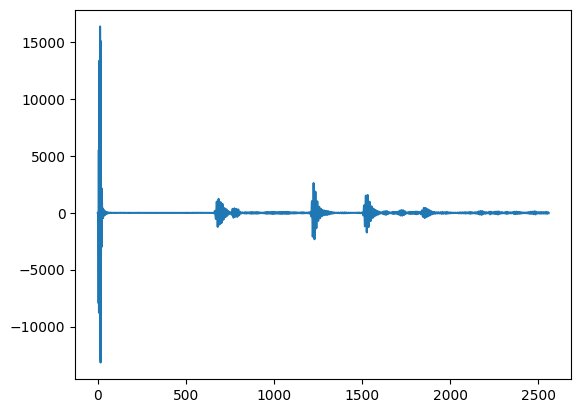

In [9]:
# Squeeze the waveform to make it 1D and compatible with other numpy vectors
waveform = np.squeeze(waveform)

# Verify this worked
print(waveform.shape)
plt.plot(waveform)

    Apply a Tukey window to a given signal.

    Parameters:
    - signal: The input signal to which the Tukey window will be applied.
    - alpha: The parameter controlling the shape of the Tukey window.
         0 corresponds to a rectangular window, and 1 corresponds to a Hann window.
         Values between 0 and 1 produce a Tukey window with intermediate shapes.
    Returns:
    - The input signal multiplied by the Tukey window.

In [ ]:
# Create and apply the window
def tukey_window(waveform, alpha=0.1, noise_length=300):
    max_val = np.max(waveform)
    Nt = np.size(waveform)
    Nwin = Nt - noise_length
    window = tukey(Nwin, alpha)
    padding = np.zeros((noise_length,))
    #Squeeze the waveform so it has the same shape as the window, so the multiply function works properly
    # print(padding.shape)
    # print(window.shape)
    final_window = np.concatenate([padding, window])
    waveform = np.squeeze(waveform)
    waveform_win = np.multiply(final_window , waveform)

    # Plot the waveform
    plt.figure(figsize=(10, 6))  # Set the size of the plot
    plt.plot(waveform/max_val, color='blue', linestyle='-', linewidth=0.2)  # waveform and its window
    plt.savefig('waveform/max_val.png', dpi=300)  # Saves the plot as a PNG file
    plt.savefig(os.path.join(folder_path, 'waveform/max_val.png'))
    plt.plot(waveform_win/max_val, color='red', linestyle='-', linewidth=0.2)
    plt.savefig('waveform_win/max_val.png', dpi=300)  # Saves the plot as a PNG file
    plt.savefig(os.path.join(folder_path, 'waveform_win/max_val.png'))
    plt.show()
    return waveform_win

[-0.         -0.         -0.         ...  0.00022349 -0.00020487
 -0.        ]


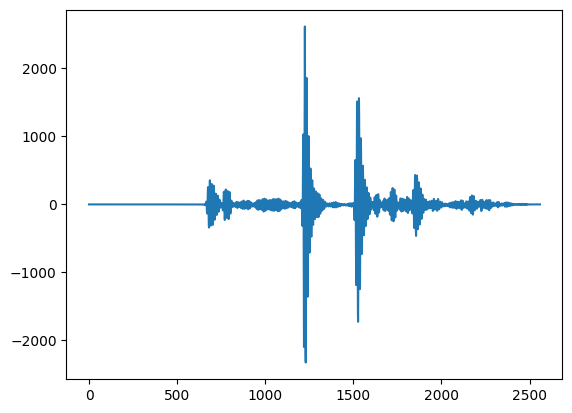

In [8]:
# Obtain and print the results
noise_length = int(40e-6 * samplingFrequency) # dt value might not always be 80ns, to ensure that noise_length isn't affected sampling frequency was used
waveform_win = hf.tukey_window(waveform, alpha=0.5, noise_length =  noise_length)
print(waveform_win)

    Perform envelope detection on a given waveform.

    Parameters:
    - waveform_win: The input waveform to perform envelope detection on.

    Returns:
    - The envelope of the input waveform.

In [ ]:
# # Function for envelope detection
# def envelope_detection(waveform_win):
#     analytic_signal = hilbert(waveform_win)
#     envelope = np.abs(analytic_signal)
#     # Compute and test the envelope function
#     # envelope = envelope_detection(waveform_win)
#     return envelope

In [ ]:
test = hf.envelope_detection(waveform_win)
print(test.shape)

    Pre-process ultrasound waveform data.

    Parameters:
    - waveform: The original ultrasound waveform data.
    - alpha: Tukey window parameter.
    - noise_length: Length of the noise signal to be zero-padded.

    Returns:
    - The pre-processed envelope data.

In [ ]:
# # Function for pre-processing data
# def preProcessData(waveform, alpha=0.1, noise_length=300):
#     # Apply Tukey window
#     waveform_win = tukey_window(waveform, alpha, noise_length)
#     # Test the pre-processing function 
#     envelope = envelope_detection(waveform_win)
#     return envelope

In [ ]:
envelope = hf.preProcessData(waveform, alpha=0.1, noise_length=300)
# plt.plot(envelope)

print(envelope[1250])

In [ ]:
# # Plot and save figures for different alpha and noise_length values
# alphas = [0.1]
# noise_lengths = [300]

# for alpha_val in alphas:
#     for noise_length_val in noise_lengths:
#         envelope = preProcessData(waveform, alpha=alpha_val, noise_length=noise_length_val)
#         plt.plot(envelope)
#         plt.title(f"Alpha={alpha_val}, Noise Length={noise_length_val}")
#         plt.xlabel("Sample Index")
#         plt.ylabel("Envelope")
#         plt.savefig(os.path.join(folder_path, f"envelopealpha{alpha_val}noise{noise_length_val}.png"))
#         pause
#         plt.clf()
        

    Create a 2D imaging grid.

    Parameters:
    - dx: Spacing between grid points.
    - Lx: Total size of the grid.

    Returns:
    - X, Y: Meshgrid representing the imaging grid.

In [ ]:
# # Imaging grid: 
# def createImagingGrid(dx, Lx):
#     Nx = round(Lx / dx)
#     x_vec = np.arange(0, Nx) * dx - np.mean(np.arange(0, Nx) * dx)
#     X, Y = np.meshgrid(x_vec, x_vec)
#     return X, Y

In [ ]:
# Test the create Imaging Grid function with dx = 0.0003 and Lx = 0.24
dx = 0.0003
Lx = 0.24
X, Y = hf.createImagingGrid(dx, Lx)

In [ ]:
# Plot X and Y using plt.imshow
plt.imshow(X, extent=(X.min(), X.max(), Y.min(), Y.max()))
plt.colorbar(label="X")
plt.title("X Matrix")
plt.xlabel("X")
plt.ylabel("Y")
plt.savefig(os.path.join(folder_path"data/X_matrix.png"))
plt.clf()

plt.imshow(Y, extent=(X.min(), X.max(), Y.min(), Y.max()))
plt.colorbar(label="Y")
plt.title("Y Matrix")
plt.xlabel("X")
plt.ylabel("Y")
plt.savefig(os.path.join(folder_path, "data/Y_matrix.png"))



    Calculate the travel time of ultrasound waves.

    Parameters:
    - Xt, Yt: Transmitter coordinates.
    - Xr, Yr: Receiver coordinates.
    - Xp, Yp: Pixel coordinates.
    - soundSpeed: Speed of sound in the medium.

    Returns:
    - Travel time in seconds.

In [ ]:
# def getTravelTime(Xt, Yt, Xr, Yr, Xp, Yp, soundSpeed):
#     # Calculate the distances
#     distance_tx_to_pixel = np.sqrt((Xt - Xp)**2 + (Yt - Yp)**2)
#     distance_pixel_to_rx = np.sqrt((Xr - Xp)**2 + (Yr - Yp)**2)

#     # Calculate the total travel distance
#     total_distance = distance_tx_to_pixel + distance_pixel_to_rx

#     # Convert distance to travel time
#     travelTime = total_distance / soundSpeed

#     return travelTime

In [ ]:
# Coordinates for the 1st transmitter (replace with actual indices)
Xt = elementPositions[0, 0]
Yt = elementPositions[0, 1]

# Coordinates for the 31st receiver (replace with actual indices)
Xr = elementPositions[30, 0]
Yr = elementPositions[30, 1]

# Make an imaging grid and choose a random pixel
X, Y = hf.createImagingGrid(dx, Lx)  # Replace values accordingly
pixel_row = 400
pixel_col = 400
Xp = X[pixel_row, pixel_col]  # Replace with the desired pixel coordinates
Yp = Y[pixel_row, pixel_col]

# Print the coordinates
# print(f"Transmitter Coordinates: Xt={Xt}, Yt={Yt}")
# print(f"Receiver Coordinates: Xr={Xr}, Yr={Yr}")
# print(f"Pixel Coordinates: Xp={Xp}, Yp={Yp}")

In [ ]:
# Calculate the travel time
travelTime = hf.getTravelTime(Xt, Yt, Xr, Yr, Xp, Yp, soundSpeed)
print(f"Travel Time: {travelTime} seconds ({travelTime * 1e6} microseconds)")

In [ ]:
# def time_to_sample_index(time, sample_frequency):
#     return int(time * sample_frequency)

# # Assuming you have a time value in seconds and the sample frequency
# time = 0.001  # Replace with your time value
# sample_frequency = 10e6  # Replace with your sample frequency

# sample_index = time_to_sample_index(time, sample_frequency)
# print(f"Sample Index: {sample_index}")

In [ ]:
# Assuming you want the waveform from the first transmitter and the second receiver
Tx = 0  # Index of the transmitter
Rx = 1  # Index of the receiver

# Extracting the waveform
signal = rcvData[Tx, Rx, :]

# Now, 'signal' contains the waveform from the specified transmitter and receiver
